In [1]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf

2024-09-11 19:06:52.134600: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-11 19:06:52.451795: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 19:06:56.562574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 19:07:00.071536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 19:07:02.653725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [70]:
train_df = pd.read_csv("resources/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()
set(train_df.dtypes.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

{dtype('int64'), dtype('float64'), dtype('O')}

<Axes: >

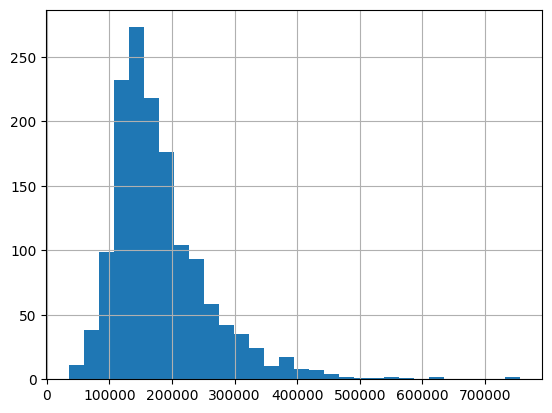

In [71]:
train_df['SalePrice'].hist(bins=30)

In [73]:
# defined evaluation metric is RMSE between the logarithm of the predicted value and the logarithm of the observed sales price
train_df['SalePriceLog'] = np.log(train_df['SalePrice'])

train_df.drop(columns=['Id', 'SalePrice'], inplace=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceLog
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


<Axes: >

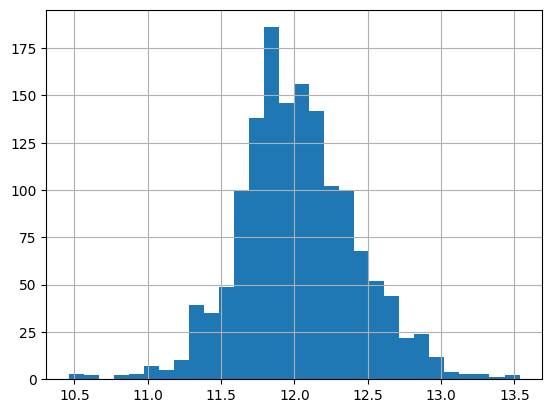

In [74]:
train_df['SalePriceLog'].hist(bins=30)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

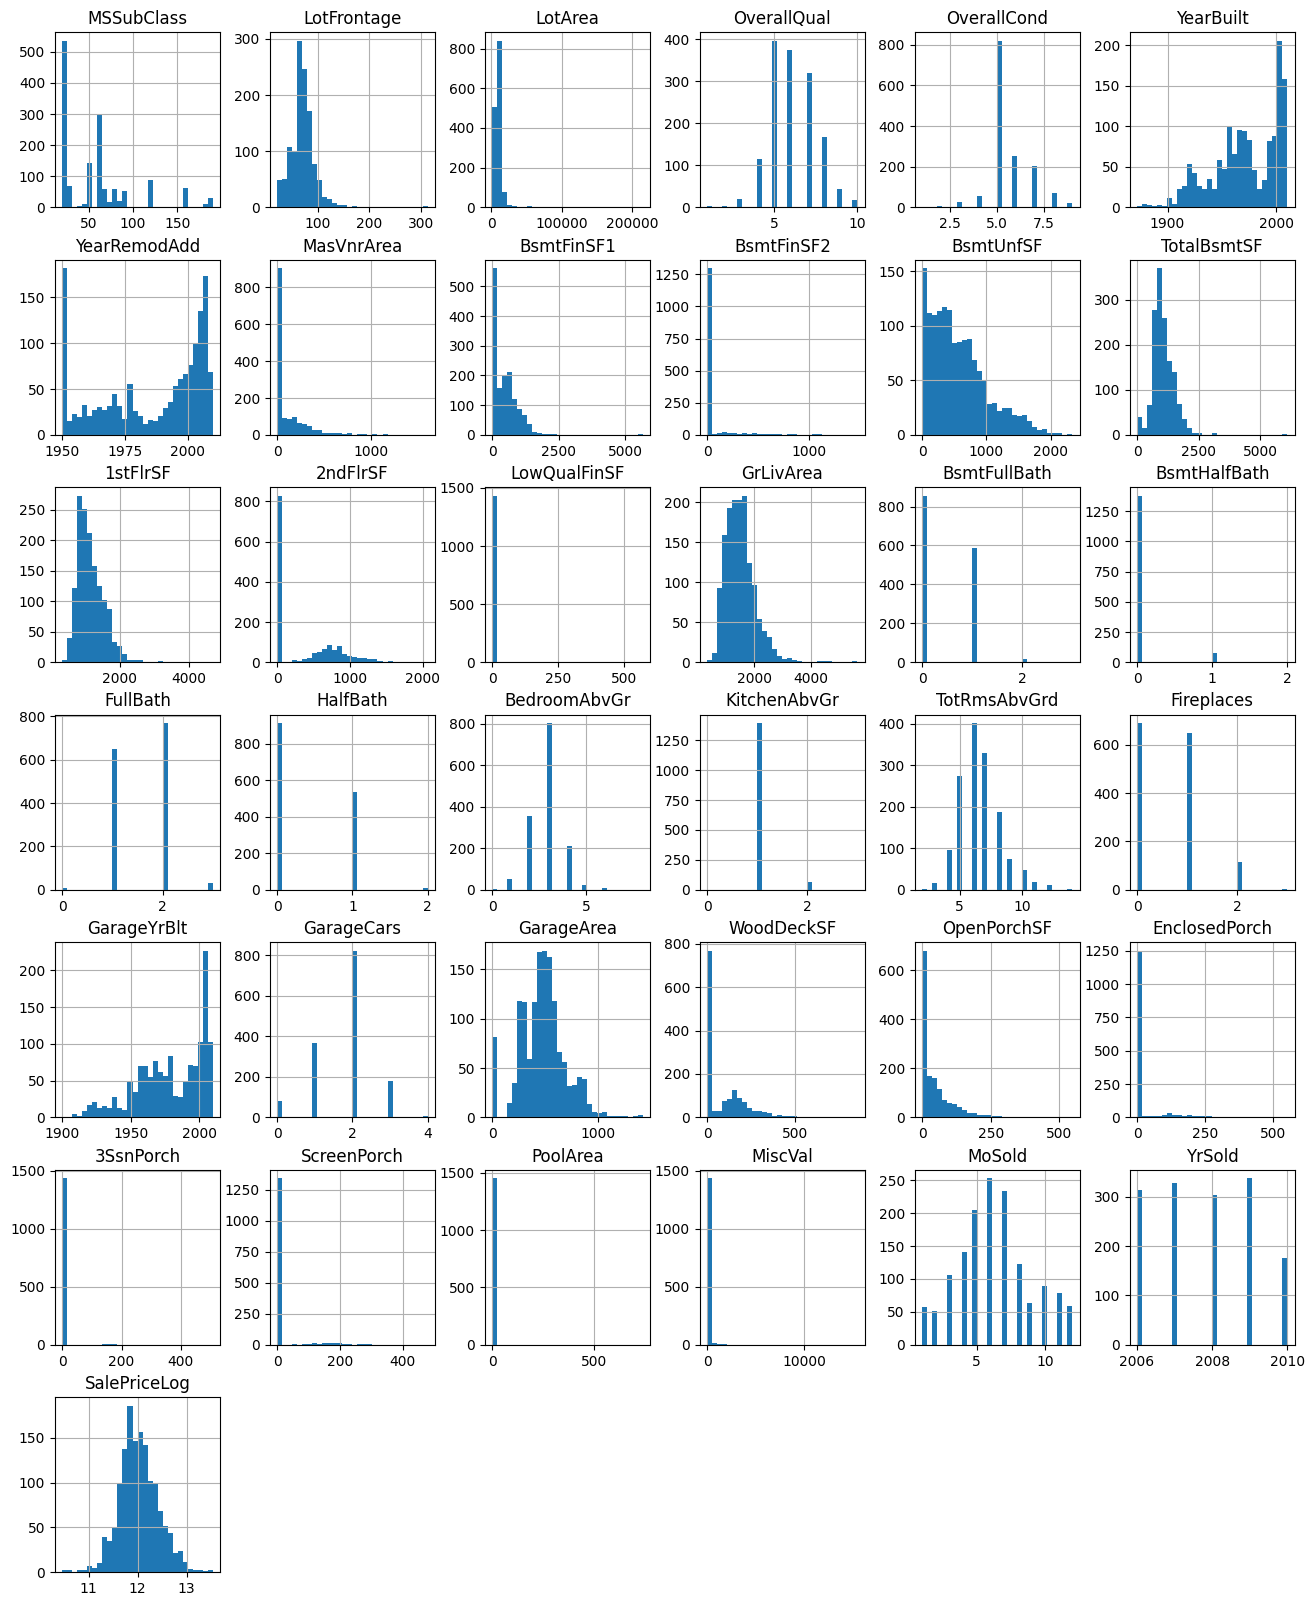

In [69]:
train_df.select_dtypes(include = ['float64', 'int64']).hist(figsize=(16,20), bins=30)

In [75]:
# let's try out a default random forest regression model
rf_model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf_model.compile(metrics=['mse'])
rf_model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='SalePriceLog', task=tfdf.keras.Task.REGRESSION))

Use /tmp/tmpmx5kma8n as temporary training directory


Reading training dataset...
Training dataset read in 0:00:02.453540. Found 1460 examples.
Training model...


I0000 00:00:1726079420.591592     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079420.591704     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079420.591741     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079420.592202     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079420.592246     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079420.594884     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079420.595008     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.385934
Compiling model...
Model compiled.


In [76]:
rf_model.summary()
# the oob evaluation is 0.134416, which I think isn't too bad given that the values of log(SalePrice) are between 10 and 13

Model: "random_forest_model_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	Heating
	HeatingQC
	HouseStyle
	KitchenAbvGr
	KitchenQual
	LandContour
	LandSlope
	LotArea
	LotConfig
	LotFrontage
	LotShap

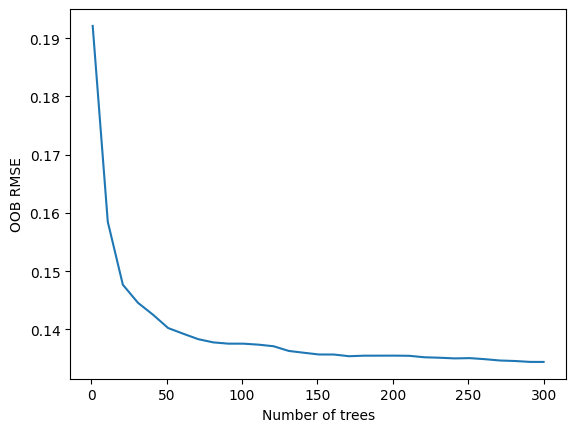

In [12]:
import matplotlib.pyplot as plt 
logs = rf_model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB RMSE")
plt.show()

In [78]:
# let's tweak the number of features to consider for each tree
num_input_features = train_df.shape[1] - 1
print(num_input_features)
print(round(np.sqrt(num_input_features))) # the default value

79
9


In [79]:
# let's try a few values below and above the default value 9
oob_evals = {}
for num_feat in list(range(7,20)):
  rf_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION, 
    num_candidate_attributes=num_feat
    )
  rf_model.compile(metrics=['mse'])
  rf_model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='SalePriceLog', task=tfdf.keras.Task.REGRESSION))
  
  final_oob_eval = rf_model.make_inspector().evaluation().to_dict()['rmse']
  oob_evals[num_feat] = final_oob_eval

Use /tmp/tmp13tcn9x9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.613919. Found 1460 examples.
Training model...


I0000 00:00:1726079590.821068     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079590.821176     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079590.821211     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079590.821601     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079590.821642     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079590.824046     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079590.824136     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:00.976875
Compiling model...


I0000 00:00:1726079591.771125     801 decision_forest.cc:761] Model loaded with 300 root(s), 137484 node(s), and 75 input feature(s).
I0000 00:00:1726079591.771215     801 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-11 20:33:11.771248: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmphyk9l_id as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.399211. Found 1460 examples.
Training model...


I0000 00:00:1726079595.704865     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079595.704925     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079595.704945     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079595.705248     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079595.705289     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079595.707244     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079595.707310     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.590408
Compiling model...


I0000 00:00:1726079597.269880     801 decision_forest.cc:761] Model loaded with 300 root(s), 137674 node(s), and 75 input feature(s).
2024-09-11 20:33:17.270021: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpggtrk2u8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.918665. Found 1460 examples.
Training model...


I0000 00:00:1726079601.739842     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079601.739914     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079601.739938     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079601.740430     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079601.740461     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079601.743455     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079601.743573     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.257916
Compiling model...
Model compiled.
Use /tmp/tmpvk633fvp as temporary training directory
Reading training dataset...
Training dataset read in 0:00:03.167231. Found 1460 examples.
Training model...


I0000 00:00:1726079608.050994     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079608.051088     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079608.051117     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079608.052236     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079608.052346     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079608.057098     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079608.057265     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.324053
Compiling model...


I0000 00:00:1726079609.342749     801 decision_forest.cc:761] Model loaded with 300 root(s), 137972 node(s), and 74 input feature(s).
2024-09-11 20:33:29.342852: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpv1ezi3rq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.602477. Found 1460 examples.
Training model...


I0000 00:00:1726079613.653800     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079613.653870     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079613.653901     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079613.654165     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079613.654178     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079613.656148     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079613.656214     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.217648
Compiling model...


I0000 00:00:1726079614.837756     801 decision_forest.cc:761] Model loaded with 300 root(s), 138234 node(s), and 75 input feature(s).
I0000 00:00:1726079614.837830     801 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-11 20:33:34.837859: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpiv1ie77h as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.493515. Found 1460 examples.
Training model...


I0000 00:00:1726079619.019313     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079619.019381     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079619.019400     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079619.019711     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079619.019764     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079619.023275     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079619.023385     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.195979
Compiling model...


I0000 00:00:1726079620.188035     801 decision_forest.cc:761] Model loaded with 300 root(s), 137870 node(s), and 75 input feature(s).
2024-09-11 20:33:40.188239: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpikntfwwz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.358855. Found 1460 examples.
Training model...


I0000 00:00:1726079624.157263     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079624.157339     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079624.157358     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079624.157714     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079624.157771     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079624.159851     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079624.159918     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.136540
Compiling model...


I0000 00:00:1726079625.261395     801 decision_forest.cc:761] Model loaded with 300 root(s), 138086 node(s), and 76 input feature(s).
I0000 00:00:1726079625.261465     801 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-11 20:33:45.261496: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpw6xt9lml as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.162956. Found 1460 examples.
Training model...


I0000 00:00:1726079628.908081     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079628.908137     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079628.908157     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079628.908555     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079628.908604     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079628.911120     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079628.911194     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.266989
Compiling model...


I0000 00:00:1726079630.150907     801 decision_forest.cc:761] Model loaded with 300 root(s), 137962 node(s), and 75 input feature(s).
2024-09-11 20:33:50.150999: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmphpd355p5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.560481. Found 1460 examples.
Training model...


I0000 00:00:1726079634.298914     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079634.299018     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079634.299046     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079634.299595     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079634.299620     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079634.305908     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079634.306052     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.649339
Compiling model...


I0000 00:00:1726079635.909859     801 decision_forest.cc:761] Model loaded with 300 root(s), 138116 node(s), and 76 input feature(s).
I0000 00:00:1726079635.909976     801 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-11 20:33:55.910018: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpc0a7qjl3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.750718. Found 1460 examples.
Training model...


I0000 00:00:1726079640.981323     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079640.981396     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079640.981430     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079640.981679     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079640.981685     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079640.983949     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079640.984040     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.184658
Compiling model...


I0000 00:00:1726079642.137100     801 decision_forest.cc:761] Model loaded with 300 root(s), 138258 node(s), and 75 input feature(s).
2024-09-11 20:34:02.137231: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmp3_uxqi_6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.167308. Found 1460 examples.
Training model...


I0000 00:00:1726079645.695425     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079645.695508     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079645.695542     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079645.695785     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079645.695792     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079645.697929     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079645.697989     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.156055
Compiling model...


I0000 00:00:1726079646.825838     801 decision_forest.cc:761] Model loaded with 300 root(s), 138344 node(s), and 74 input feature(s).
I0000 00:00:1726079646.825920     801 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-11 20:34:06.825953: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmppmne29fm as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.951059. Found 1460 examples.
Training model...


I0000 00:00:1726079651.207840     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079651.207911     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079651.207935     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079651.208275     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079651.208324     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079651.210585     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079651.210655     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.205488
Compiling model...


I0000 00:00:1726079652.374770     801 decision_forest.cc:761] Model loaded with 300 root(s), 138224 node(s), and 74 input feature(s).
2024-09-11 20:34:12.374863: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
Use /tmp/tmpamujkxva as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.082952. Found 1460 examples.
Training model...


I0000 00:00:1726079655.944293     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079655.944355     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079655.944394     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079655.945083     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079655.945126     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079655.948720     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079655.948876     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.157525
Compiling model...
Model compiled.


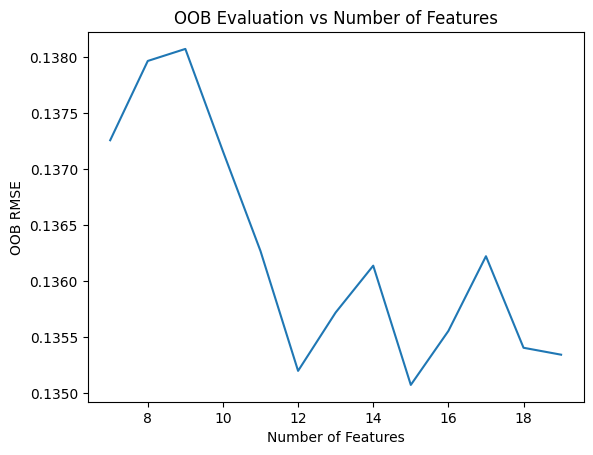

{7: 0.1372574335370617,
 8: 0.13796525025320872,
 9: 0.13807261245560662,
 10: 0.13715935142188768,
 11: 0.1362685989223829,
 12: 0.1351991797428409,
 13: 0.1357201689689391,
 14: 0.13613812733829536,
 15: 0.13507373734893505,
 16: 0.13555534868465474,
 17: 0.13622241004850785,
 18: 0.1354053835334473,
 19: 0.13534355640650064}

In [80]:
import matplotlib.pyplot as plt

x = list(oob_evals.keys())
y = list(oob_evals.values())

plt.plot(x, y)
plt.xlabel("Number of Features")
plt.ylabel("OOB RMSE")
plt.title("OOB Evaluation vs Number of Features")
plt.show()

oob_evals
# we choose the model with 15 features

In [81]:
# fit the model with 15 features
rf_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION, 
    num_candidate_attributes=15
    )
rf_model.compile(metrics=['mse'])
rf_model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='SalePriceLog', task=tfdf.keras.Task.REGRESSION))


Use /tmp/tmpm5_05ngz as temporary training directory


Reading training dataset...
Training dataset read in 0:00:02.543859. Found 1460 examples.
Training model...


I0000 00:00:1726079916.287106     801 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1726079916.287179     801 kernel.cc:775] Collect training examples
I0000 00:00:1726079916.287198     801 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1726079916.287544     801 kernel.cc:394] Number of batches: 2
I0000 00:00:1726079916.287592     801 kernel.cc:395] Number of examples: 1460
I0000 00:00:1726079916.289735     801 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1726079916.289802     801 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.174493
Compiling model...


I0000 00:00:1726079917.434625     801 decision_forest.cc:761] Model loaded with 300 root(s), 138116 node(s), and 76 input feature(s).
I0000 00:00:1726079917.434734     801 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-11 20:38:37.434768: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


In [82]:
# load the test values
test_df = pd.read_csv("resources/test.csv")
test_df.head()

ids = test_df.pop('Id')

# make predictions
predictions_logs = rf_model.predict(tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task = tfdf.keras.Task.REGRESSION))
predictions = np.exp(predictions_logs)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': predictions.squeeze()})

output.head()

2/2 [==============================] - 1s 26ms/step


,Id,SalePrice
0,1461,124970.757812
1,1462,154766.937500
2,1463,180522.390625
3,1464,181509.656250
4,1465,193242.187500


In [83]:
output.to_csv('output.csv', index=False, float_format='%.10f')

The score in the evaluation is 0.1408